# **11. 앙상블 - Bagging**

## 1.데이터 준비

#### 01.라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### 02.데이터 업로드

In [3]:
# mobile data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv"
data = pd.read_csv(path)
data.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
data.rename(columns = { 'HANDSET_PRICE':'H_PRICE',
                        'AVERAGE_CALL_DURATION':'DURATION',
                        'REPORTED_SATISFACTION':'SATISFACTION',
                        'CONSIDERING_CHANGE_OF_PLAN':'CHANGE' }
            , inplace = True)
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,H_PRICE,DURATION,SATISFACTION,CHANGE,CHURN
0,0,31953,0,6,313378,161,4,unsat,no,STAY
1,1,36147,0,13,800586,244,6,unsat,considering,STAY
2,1,27273,230,0,305049,201,15,unsat,perhaps,STAY
3,0,120070,38,33,788235,780,2,unsat,considering,LEAVE
4,1,29215,208,85,224784,241,1,very_unsat,never_thought,STAY


|변수 명|내용|구분|
|----|----|----|
|	COLLEGE	|	대학졸업 여부(1,0) - 범주	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간비율(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ) - 범주	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it') - 범주	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	**Target**	|


In [4]:
# 데이터분할1
target = 'CHURN'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 가변수화
dumm_cols = ['SATISFACTION','CHANGE']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

# 데이터 분할2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.5)

## 2.모델링


In [5]:
# 1) 함수 불러오기
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [6]:
# 2) 모델 선언
model = RandomForestClassifier(n_estimators = 5, max_depth = 3)

In [7]:
# 3) 학습
model.fit(x_train, y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# 4) 예측
pred = model.predict(x_val)

In [9]:
# 5) 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       LEAVE       0.68      0.66      0.67      4943
        STAY       0.68      0.70      0.69      5057

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



## 3.Random Forest에 대해서...

### (1) 모델의 내부를 살펴봅시다.

In [ ]:
# 5개 decision tree
model.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1833640491),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1606448868),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=79051924),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=784342213),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=489290074)]

[Text(0.5, 0.875, 'H_PRICE <= 399.5\ngini = 0.5\nsamples = 6346\nvalue = [4924.0, 5076.0]\nclass = STAY'),
 Text(0.25, 0.625, 'DURATION <= 3.0\ngini = 0.495\nsamples = 4201\nvalue = [2987, 3619]\nclass = STAY'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'HOUSE <= 604047.5\ngini = 0.499\nsamples = 1412\nvalue = [1161, 1074]\nclass = LEAVE'),
 Text(0.0625, 0.125, 'gini = 0.435\nsamples = 911\nvalue = [1002.0, 471.0]\nclass = LEAVE'),
 Text(0.1875, 0.125, 'gini = 0.33\nsamples = 501\nvalue = [159, 603]\nclass = STAY'),
 Text(0.375, 0.375, 'LEFTOVER <= 50.5\ngini = 0.486\nsamples = 2789\nvalue = [1826, 2545]\nclass = STAY'),
 Text(0.3125, 0.125, 'gini = 0.484\nsamples = 2705\nvalue = [1735, 2489]\nclass = STAY'),
 Text(0.4375, 0.125, 'gini = 0.472\nsamples = 84\nvalue = [91, 56]\nclass = LEAVE'),
 Text(0.75, 0.625, 'OVERAGE <= 87.5\ngini = 0.49\nsamples = 2145\nvalue = [1937.0, 1457.0]\nclass = LEAVE'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'OVERAGE <= 15.5\ngini = 0.4

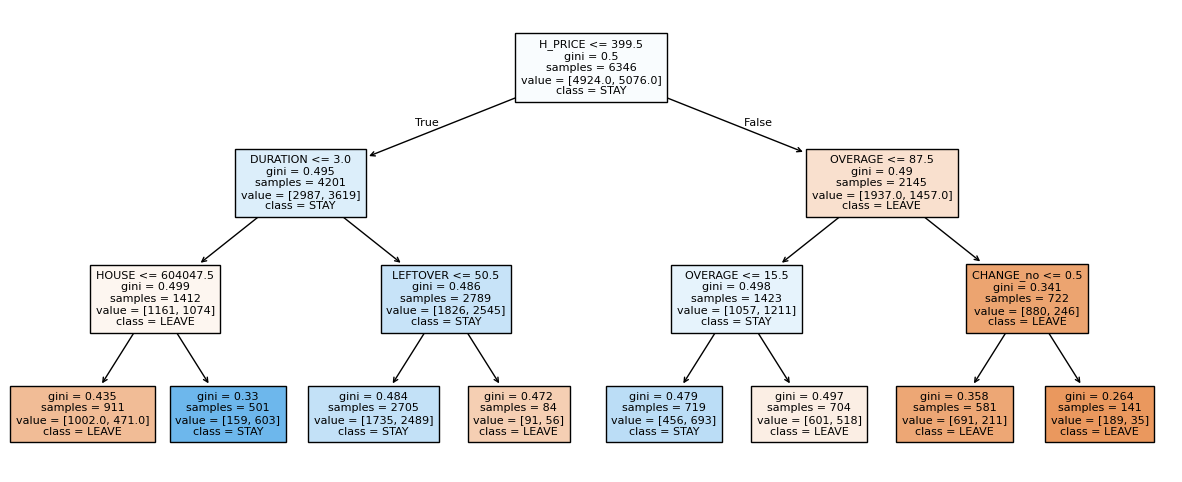

In [11]:
# 각 트리별로 시각화 할 수 있다.
plt.figure(figsize=(15,6))
plot_tree(
    model.estimators_[0],
    feature_names = x_train.columns,
    class_names= ['LEAVE','STAY'],
    filled = True, fontsize = 8
        )

### (2) 변수 중요도

In [12]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'H_PRICE',
       'DURATION', 'SATISFACTION_sat', 'SATISFACTION_unsat',
       'SATISFACTION_very_sat', 'SATISFACTION_very_unsat',
       'CHANGE_considering', 'CHANGE_never_thought', 'CHANGE_no',
       'CHANGE_perhaps'],
      dtype='object')
[7.51045730e-04 1.86672563e-01 3.41188231e-01 1.04695553e-01
 2.08646478e-01 9.45718785e-02 5.29958266e-02 0.00000000e+00
 1.85621767e-03 5.71951923e-03 0.00000000e+00 9.99759818e-04
 2.27459229e-04 1.67546807e-03 0.00000000e+00]


* 변수중요도 그래프 그리기 함수 만들기

In [13]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

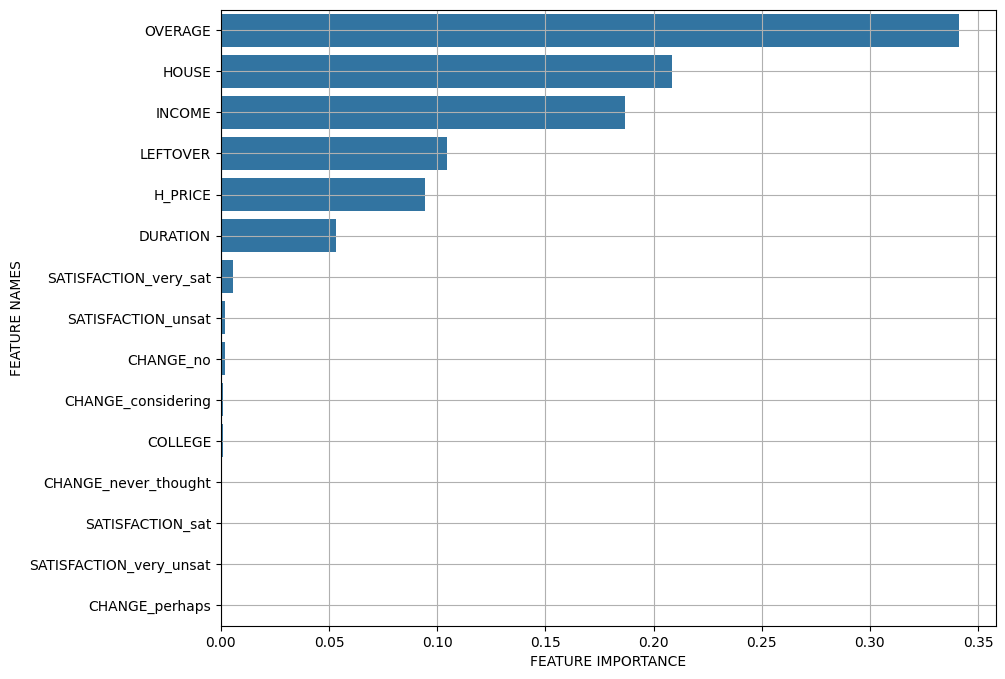

In [14]:
plot_feature_importance(model.feature_importances_, x_train.columns)

* 랜덤포레스트의 변수 중요도
    * 개별 트리의 변수 중요도의 평균

## 4.random forest 튜닝
* grid search를 수행해 보겠습니다.
    * tree의 갯수 : 10~100까지 5개씩 증가
    * max_depth : [3,5,7,9]
    * cv = 5
    * 모델링 후 cv 평가 결과를 차트로 그려보겠습니다.

In [15]:
# 하이퍼파라미터 실정
params = {'n_estimators': range(5,101,5), 'max_depth':[3,5,7,9]}

In [16]:
# 함수 불러오기
from sklearn.model_selection import GridSearchCV

In [17]:
# 모델 선언 및 학습
model_gs = GridSearchCV(RandomForestClassifier(), params, cv = 5)
model_gs.fit(x_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [3, 5, ...], 'n_estimators': range(5, 101, 5)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,55


In [18]:
# 튜닝 결과 확인
model_gs.best_params_, model_gs.best_score_

({'max_depth': 9, 'n_estimators': 55}, np.float64(0.7041999999999999))

In [19]:
# 튜닝된 모델로 예측하고 평가하기
pred = model_gs.predict(x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       LEAVE       0.69      0.68      0.69      4943
        STAY       0.69      0.70      0.70      5057

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [20]:
# 튜닝 결과 확인2 : 그래프로 확인하기
result = pd.DataFrame(model_gs.cv_results_)
result = result[['param_max_depth','param_n_estimators', 'mean_test_score']]

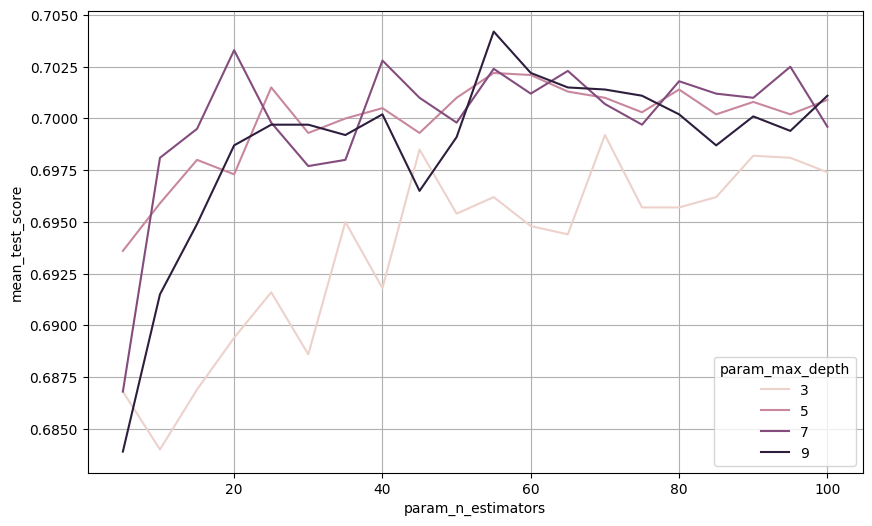

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'param_n_estimators', y = 'mean_test_score', data = result
            , hue = 'param_max_depth' )
plt.grid()
plt.show()

In [22]:
model_gs.best_estimator_.feature_importances_

array([0.01064658, 0.1263637 , 0.24981693, 0.09655378, 0.31132666,
       0.09862365, 0.05792377, 0.00472356, 0.00785073, 0.00669363,
       0.00601912, 0.00737944, 0.00541609, 0.00619945, 0.00446291])

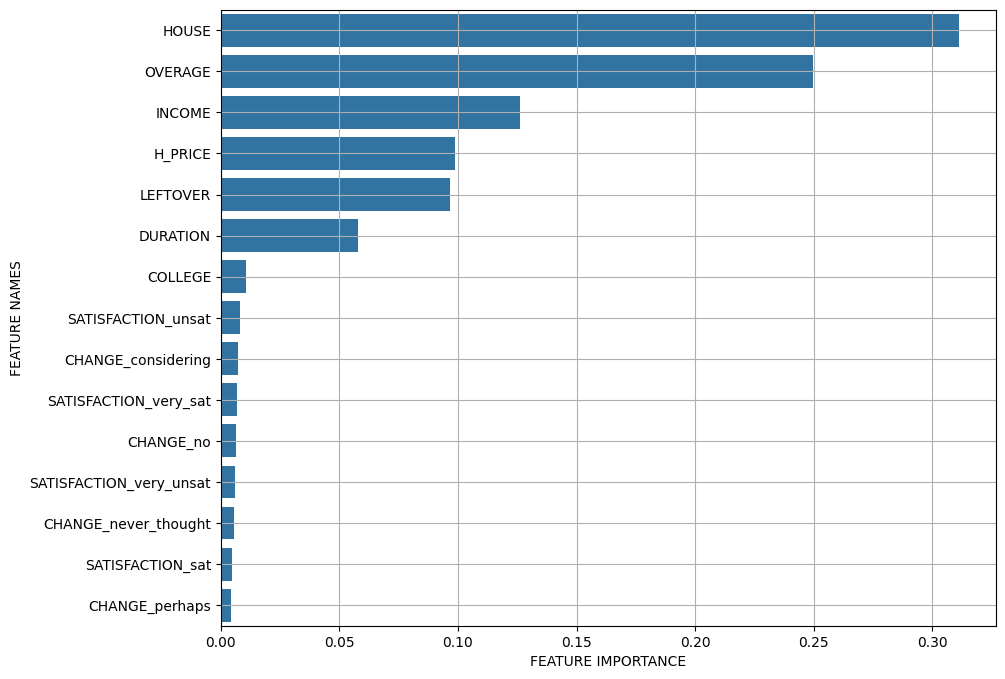

In [23]:
# 변수 중요도
plot_feature_importance(model_gs.best_estimator_.feature_importances_, x_train.columns)

## 5.복습문제
* 카시트 데이터를 이용하여 랜덤포레스트 모델을 생성해 봅시다.
    * 카시트 판매량 예측 : 회귀
    * 기본 전처리
    * 알고리즘 : **RandomForestRegressor**  (회귀 모델)
    * 모델 튜닝 : Grid Search

In [24]:
from sklearn.ensemble import RandomForestRegressor

### (1) data loading

In [25]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'

data = pd.read_csv(path)  # csv 파일을 불러올때, 지정한 칼럼의 데이터만 가져오기
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


### (2) 데이터분할1 : x, y 나누기

In [26]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (3) 가변수화

In [27]:
cat_cols = ['ShelveLoc', 'US','Urban']

In [28]:
# 첫번째 가변수 제거
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,138,73,11,276,120,42,17,False,False,True,True
1,111,48,16,260,83,65,10,True,False,True,True
2,113,35,10,269,80,59,12,False,True,True,True
3,117,100,4,466,97,55,14,False,True,True,True
4,141,64,3,340,128,38,13,False,False,False,True


### (4) 데이터분할2 : train : validation 나누기

In [29]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (5) 랜덤포레스트 모델링 : 튜닝
* 성능 튜닝을 수행해 봅시다.
* 하이퍼파라미터 범위
    * n_estimators : 10 ~ 200
    * max_depth : 2 ~ 10


In [31]:
params = {
    'n_estimators': [10*i for i in range(1, 21)],
    'max_depth': [2*i for i in range(1, 6)]
}

In [32]:
model = GridSearchCV(RandomForestRegressor(), params, cv=5)
model.fit(x_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [2, 4, ...], 'n_estimators': [10, 20, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [40]:
model.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [39]:
importances = model.best_estimator_.feature_importances_
print(importances)

[0.11293776 0.04970366 0.06155479 0.02999104 0.29767951 0.08006919
 0.02293217 0.28165614 0.05464737 0.00431941 0.00450897]


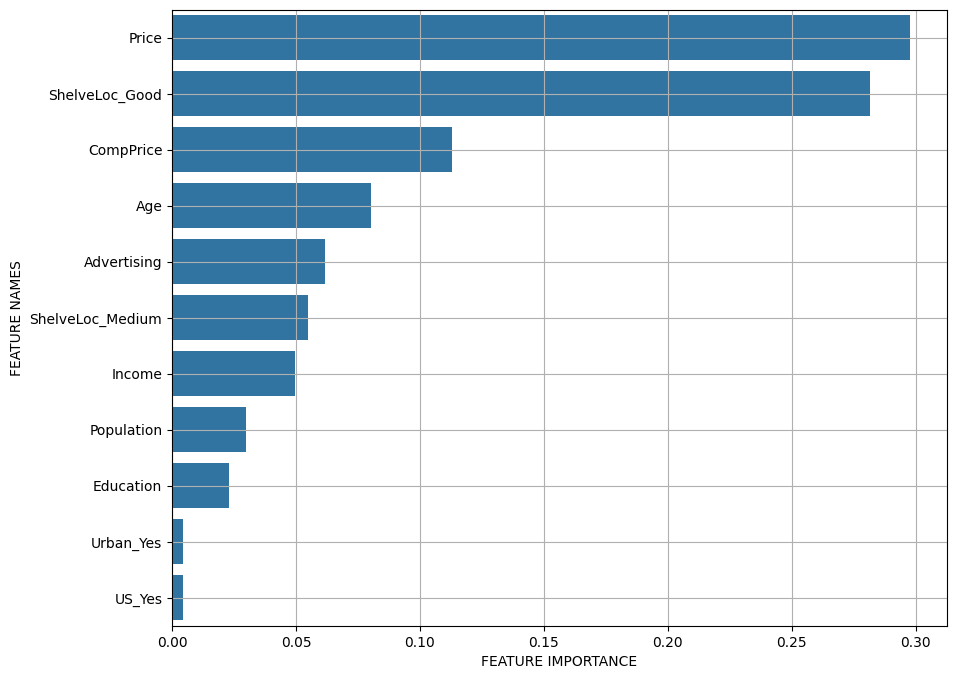

In [38]:
plot_feature_importance(importances, x_train.columns)

## 변수 중요도 파악
- 판매량에 가장 큰 영향을 미치는 2개의 변수는 가격과 좋은 진열 상태였다.
- 그 다음으로는 경쟁사 가격, 나이, 광고 투자비용, 수입 등이 뒤를 따랐다.
